<a href="https://colab.research.google.com/github/AndresR2909/poc_deepseek_ocr/blob/main/inference_config_large.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install torch==2.6.0 torchvision==0.21.0 torchaudio==2.6.0 --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.2/23.2 MB 123.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 875.6/875.6 kB 67.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 123.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 663.9/663.9 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.9/417.9 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 MB 44.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 MB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.1/204.1 MB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 MB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/

In [ ]:
# pip install vllm-0.8.5+cu118-cp38-abi3-manylinux1_x86_64.whl

In [2]:
pip install -r /content/drive/MyDrive/poc_deekseek_ocr/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.5/106.5 kB 10.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 143.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 114.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 122.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 50.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.0/88.0 kB 10.1 MB/s eta 0:00:00
  Created wheel for img2pdf: filename=img2pdf-0.6.1-py3-none-any.whl size=51001 sha256=6c5bcf86702255b02a7f85e6aa9709532e2996219ff554f1a664b8abf2a57911
  Stored in directory: /root/.cache/pip/wheels/a5/05/56/c05447973db749cd2178b8f95e36f007f0af5f5dce2c6197a5
Successfully built img2pdf
  Attempting uninstall: wrapt
    Found existing installation: wrapt 2.0.0
    Uninstalling wrapt-2.0.0:
      Success

In [3]:
pip install flash-attn==2.7.3 --no-build-isolation

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 74.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for flash-attn: filename=flash_attn-2.7.3-cp312-cp312-linux_x86_64.whl size=193185550 sha256=ca3d170cafd7095bd81ae8b72a16ab65b922fb29b3bb60686d09046a81e05dc5
  Stored in directory: /root/.cache/pip/wheels/f6/ba/3a/e5622e4a21e0735b65d5f7a0aca41c83467aaf2122031d214e
Successfully built flash-attn


In [ ]:
#pip install addict

In [6]:
import torch

if torch.cuda.is_available():
    torch.cuda.empty_cache()
    print("CUDA cache cleared.")
else:
    print("CUDA is not available.")

CUDA cache cleared.


In [7]:
from transformers import AutoModel, AutoTokenizer
import torch
import os
os.environ["CUDA_VISIBLE_DEVICES"] = '0'
model_name = 'deepseek-ai/DeepSeek-OCR'

tokenizer = AutoTokenizer.from_pretrained(model_name, trust_remote_code=True)
model = AutoModel.from_pretrained(model_name, _attn_implementation='flash_attention_2', trust_remote_code=True, use_safetensors=True)
model = model.eval().cuda().to(torch.bfloat16)

You are using a model of type deepseek_vl_v2 to instantiate a model of type DeepseekOCR. This is not supported for all configurations of models and can yield errors.
Some weights of DeepseekOCRForCausalLM were not initialized from the model checkpoint at deepseek-ai/DeepSeek-OCR and are newly initialized: ['model.vision_model.embeddings.position_ids']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
model.save_pretrained('/content/drive/MyDrive/poc_deekseek_ocr/deepseek_ocr_model')

In [ ]:
tokenizer.save_pretrained('/content/drive/MyDrive/poc_deekseek_ocr/deepseek_ocr_model')

('/content/drive/MyDrive/poc_deekseek_ocr/deepseek_ocr_model/tokenizer_config.json',
 '/content/drive/MyDrive/poc_deekseek_ocr/deepseek_ocr_model/special_tokens_map.json',
 '/content/drive/MyDrive/poc_deekseek_ocr/deepseek_ocr_model/tokenizer.json')

In [ ]:
# infer(self, tokenizer, prompt='', image_file='', output_path = ' ', base_size = 1024, image_size = 640, crop_mode = True, test_compress = False, save_results = False):

# Tiny: base_size = 512, image_size = 512, crop_mode = False
# Small: base_size = 640, image_size = 640, crop_mode = False
# Base: base_size = 1024, image_size = 1024, crop_mode = False
# Large: base_size = 1280, image_size = 1280, crop_mode = False

# Gundam: base_size = 1024, image_size = 640, crop_mode = True


In [9]:
def perform_inference(model, tokenizer, prompt, image_file, output_path):
    """
    Performs inference using the model.infer method.

    Args:
        model: The model object.
        tokenizer: The tokenizer object.
        prompt: The prompt string.
        image_file: The path to the image file.
        output_path: The path to save the output.

    Returns:
        The result of the model.infer call.
    """
    res = model.infer(
        tokenizer,
        prompt=prompt,
        image_file=image_file,
        output_path=output_path,
        base_size=1280,
        image_size=1280,
        crop_mode=False,
        save_results=True,
        test_compress=True
    )
    return res

## Create lists of prompts and images

In [10]:
prompts = [
    "<image>\nFree OCR.",
    "<image>\nConvert the document to markdown.",
    "<image>\nParse the figure.",
    "<image>\nidentify all objects in the image and output them in bounding boxes.",
    "<image>\nLocate <|ref|> icecream <|/ref|> in the image.",
    "<image>\nLocate <|ref|> X=6 <|/ref|> in the image.",
    "<image>\nDescribe this image in detail."
]

image_files = [
    '/content/drive/MyDrive/poc_deekseek_ocr/input/reporte_financiero.png',
    '/content/drive/MyDrive/poc_deekseek_ocr/input/reporte_financiero.png',
    '/content/drive/MyDrive/poc_deekseek_ocr/input/reporte_financiero_2.png',
    '/content/drive/MyDrive/poc_deekseek_ocr/input/minimalisto-salas-pequenas-modernas-1-jpg.webp',
    '/content/drive/MyDrive/poc_deekseek_ocr/input/reto-visual-shutterstock.jpg',
    '/content/drive/MyDrive/poc_deekseek_ocr/input/buscar_ecuacion.jpg',
    '/content/drive/MyDrive/poc_deekseek_ocr/input/frame_video_3.png'
]

output_paths = [
    '/content/drive/MyDrive/poc_deekseek_ocr/output_reporte_financiero_ocr',
    '/content/drive/MyDrive/poc_deekseek_ocr/output_reporte_financiero_markdown',
    '/content/drive/MyDrive/poc_deekseek_ocr/output_reporte_financiero_2',
    '/content/drive/MyDrive/poc_deekseek_ocr/output_minimalisto-salas-pequenas-modernas-1-jpg',
    '/content/drive/MyDrive/poc_deekseek_ocr/output_reto-visual-shutterstock.jpg',
    '/content/drive/MyDrive/poc_deekseek_ocr/output_buscar_ecuacion.jpg',
    '/content/drive/MyDrive/poc_deekseek_ocr/output_frame_video_3.png'
]

## Iterate and perform inference


In [11]:
inference_results = []
for prompt, image_file, output_path in zip(prompts, image_files, output_paths):
    print(f"Processing image: {image_file} with prompt: {prompt}")
    res = perform_inference(model, tokenizer, prompt, image_file, output_path)
    inference_results.append({
        'prompt': prompt,
        'image_file': image_file,
        'output_path': output_path,
        'result': res
    })
    print("Inference complete.")


/usr/local/lib/python3.12/dist-packages/transformers/generation/configuration_utils.py:590: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Processing image: /content/drive/MyDrive/poc_deekseek_ocr/input/reporte_financiero.png with prompt: <image>
Free OCR.
BASE:  torch.Size([1, 400, 1280])
NO PATCHES
# RESULTADOS GRUPO ARGOS 2Q2025

## CemArgos: EBITDA afectado por deterioro contable

### Operacional

- **Cemento**
- **RMC**

\[\begin{align*}
\text{Compras (M reais)} & \\
2,112 & 648 \\
2,292 & 686 \\
2,197 & 654 \\
2,110 & 587 \\
2,192 & 548 \\
\end{align*}\]

- **-15%**

- **4%**

- **-15%**

- **-5% (A/A)**

- **2Q2025 vs 2Q2024**

- **2Q2025 vs 2Q2024**

- **2Q2025**

- **2Q2025**

- **2Q2025**

- **2Q225**

- **2Q225**

- **2Q225**

- **2Q225**

### Ingresos

- **2Q2025 vs 2Q2024**

- **2Q2025**  
  **1,344**

- **2Q2025**  
  **1,336**

- **2Q2025**  
  **1,308**

- **2Q2025**  
  **1,231**

- **2Q2025**  
  **1,283**

- **2Q2025**  
  **1,231**

- **2Q225**  
  **311**

- **2Q225**  
  **265**

- **2Q225**  
  **253**

- **2Q225**  
  **258**

- **2Q225**  
  **235**

- **2Q225**  
  **$60 de deterioro**

- **2Q225

image: 0it [00:00, ?it/s]
other: 0it [00:00, ?it/s]

Inference complete.
Processing image: /content/drive/MyDrive/poc_deekseek_ocr/input/reporte_financiero.png with prompt: <image>
Convert the document to markdown.



The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


BASE:  torch.Size([1, 400, 1280])
NO PATCHES
# RESULTADOS GRUPO ARGOS 2Q2025

## CemArgos: EBITDA afectado por deterioro contable

### Operacional

- **Cemento**
- **RMC**

\[\begin{align*}
\text{Compras (M reais)} & \\
2,112 & 648 \\
2,292 & 686 \\
2,197 & 654 \\
2,110 & 587 \\
2,192 & 548 \\
\end{align*}\]

- **-15%**

- **4%**

- **-15%**

- **-5% (A/A)**

- **2Q2025 vs 2Q2024**

- **2Q2025 vs 2Q2024**

- **-5% (A/A)**

- **2Q2025 vs 2O2024**

- **2Q2025 vs 2O2024**

- **-5% (A/A)**

- **2Q2025 vs O2024**

- **2Q2025 vs O2024**

- **-5% (A/A)**

- **2Q2025 vs RMC (M reais)**

- **2Q2025 vs RMC (M reais)**

- **2Q25**

- **2Q25**

- **2Q25**

- **2Q25**

- **(A/A)**

- **2Q25**

- **2Q25**

- **2Q25**

### EBITDA

- **2Q2025 vs 2Q2024**

- **2Q2025**

- **2Q2025**

- **2Q2025**

- **2Q25**

- **2Q25**

- **2Q25**

### COF mil mn

- **2Q2025 vs 2Q2024**

- **2Q2024**

- **2Q2024**

- **2Q2024**

### EBITDA

- **2Q2025 vs 2Q2024**

- **1,344**

- **1,336**

- **1,308**

- **1,231**

- 

image: 0it [00:00, ?it/s]
other: 0it [00:00, ?it/s]

Inference complete.
Processing image: /content/drive/MyDrive/poc_deekseek_ocr/input/reporte_financiero_2.png with prompt: <image>
Parse the figure.



The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


BASE:  torch.Size([1, 400, 1280])
NO PATCHES
The image displays a bar chart titled "RESULTADOS GRUPO ARGOS 202205" which translates to "RESULTS OF THE ARGOS GROUP 202205." The chart is divided into two main sections, each with a title and a set of bars representing different data points.

On the left side, under the title "Flujo de Caja Acumulado," there are six bars, each labeled with a number from 1 to 6. The bars are color-coded: the first bar is blue, the second is green, the third is red, the fourth is yellow, the fifth is purple, and the sixth is orange. Each bar is labeled with a percentage value, indicating the proportion of the total amount in each category. The percentages range from 14.1% to 4.3%.

On the right side, under the title "Notas," there are three bullet points providing additional information. The first bullet point states that the data is divided into five categories: "Dividendos netos," "Ingresos NDU," "Compra/venta acciones," "Egresos GA," "Egresos NDU," "Impue

image: 0it [00:00, ?it/s]
other: 0it [00:00, ?it/s]

Inference complete.
Processing image: /content/drive/MyDrive/poc_deekseek_ocr/input/minimalisto-salas-pequenas-modernas-1-jpg.webp with prompt: <image>
identify all objects in the image and output them in bounding boxes.



The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


BASE:  torch.Size([1, 400, 1280])
NO PATCHES
<|ref|>Pillow<|/ref|><|det|>[[325, 504, 444, 641], [530, 520, 625, 655]]<|/det|>
<|ref|>Picture<|/ref|><|det|>[[0, 420, 201, 801], [386, 66, 641, 448]]<|/det|>
<|ref|>Couch<|/ref|><|det|>[[202, 510, 830, 905]]<|/det|>
<|ref|>Carpet<|/ref|><|det|>[[208, 871, 808, 996]]<|/det|>
<|ref|>Potted Plant<|/ref|><|det|>[[640, 600, 711, 725]]<|/det|>
<|ref|>Lamp<|/ref|><|det|>[[135, 0, 199, 355]]<|/det|>
<|ref|>Chair<|/ref|><|det|>[[0, 650, 145, 976]]<|/det|>
<|ref|>Desk<|/ref|><|det|>[[863, 650, 997, 996]]<|/det|>
<|ref|>Dog<|/ref|><|det|>[[410, 525, 555, 720]]<|/det|>
image size:  (600, 400)
valid image tokens:  266
output texts tokens (valid):  195
compression ratio:  0.73
===============save results:===============


image: 0it [00:00, ?it/s]
other: 100%|██████████| 9/9 [00:00<00:00, 87179.53it/s]

Inference complete.
Processing image: /content/drive/MyDrive/poc_deekseek_ocr/input/reto-visual-shutterstock.jpg with prompt: <image>
Locate <|ref|> icecream <|/ref|> in the image.



The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


BASE:  torch.Size([1, 400, 1280])
NO PATCHES
<|ref|> icecream <|/ref|><|det|>[[68, 111, 144, 230], [168, 115, 245, 230], [170, 291, 240, 400], [700, 405, 774, 520], [816, 110, 875, 230]]<|/det|>
image size:  (1200, 747)
valid image tokens:  249
output texts tokens (valid):  68
compression ratio:  0.27
===============save results:===============


image: 0it [00:00, ?it/s]
other: 100%|██████████| 1/1 [00:00<00:00, 10591.68it/s]

Inference complete.
Processing image: /content/drive/MyDrive/poc_deekseek_ocr/input/buscar_ecuacion.jpg with prompt: <image>
Locate <|ref|> X=6 <|/ref|> in the image.



The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


BASE:  torch.Size([1, 400, 1280])
NO PATCHES
<|ref|> X=6 <|/ref|><|det|>[[250, 800, 388, 940]]<|/det|>
image size:  (686, 386)
valid image tokens:  225
output texts tokens (valid):  21
compression ratio:  0.09
===============save results:===============


image: 0it [00:00, ?it/s]
other: 100%|██████████| 1/1 [00:00<00:00, 13486.51it/s]

Inference complete.
Processing image: /content/drive/MyDrive/poc_deekseek_ocr/input/frame_video_3.png with prompt: <image>
Describe this image in detail.



The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


BASE:  torch.Size([1, 400, 1280])
NO PATCHES
A screenshot of a trading terminal. The terminal is displaying a chart of the price of the E-mini S&P 500 futures contract. The chart is in a downtrend, and the price is currently trading at 7,130. The chart is also displaying a number of technical indicators, including the Relative Strength Index (RSI), the Moving Average Convergence Divergence (MACD), and the Bollinger Bands. The RSI is currently at 50, which is in the overbought territory. This indicates that the price is likely to continue to fall. The MACD is also in the overbought territory, which indicates that the price is likely to continue to fall. The Bollinger Bands are also in the overbought territory, which indicates that the price is likely to continue to fall.

The image is a screenshot of a trading terminal. The terminal is displaying a chart of the price of the E-minI S&P 500 futures contract. The chart is in a downtrend, and the price is currentI trading at 7,130. The char

image: 0it [00:00, ?it/s]
other: 0it [00:00, ?it/s]

Inference complete.


## Display results




------------------------------------------------------------------------------------------------------------------------

--- Results for Inference 1 ---
Prompt: <image>
Free OCR.

Markdown Result:


# RESULTADOS GRUPO ARGOS 2Q2025

## CemArgos: EBITDA afectado por deterioro contable

### Operacional

- **Cemento**
- **RMC**

\[\begin{align*}
\text{Compras (M reais)} & \\
2,112 & 648 \\
2,292 & 686 \\
2,197 & 654 \\
2,110 & 587 \\
2,192 & 548 \\
\end{align*}\]

- **-15%**

- **4%**

- **-15%**

- **-5% (A/A)**

- **2Q2025 vs 2Q2024**

- **2Q2025 vs 2Q2024**

- **2Q2025**

- **2Q2025**

- **2Q2025**

- **2Q225**

- **2Q225**

- **2Q225**

- **2Q225**

### Ingresos

- **2Q2025 vs 2Q2024**

- **2Q2025**  
  **1,344**

- **2Q2025**  
  **1,336**

- **2Q2025**  
  **1,308**

- **2Q2025**  
  **1,231**

- **2Q2025**  
  **1,283**

- **2Q2025**  
  **1,231**

- **2Q225**  
  **311**

- **2Q225**  
  **265**

- **2Q225**  
  **253**

- **2Q225**  
  **258**

- **2Q225**  
  **235**

- **2Q225**  
  **$60 de deterioro**

- **2Q225**  
  **2Q225**

- **2Q225**  
  **2Q225**

- **2Q225**

- **2Q225**

- **Incluye efecto por ajuste contable asociado al reconocimiento de obsoletos de Puerto Rico**

- **Ajuste de Puerto Rico**

- **Inversiones que transforman**

- **GRUPO ARGOS**

- **Inversiones que transforman**

- **Ajuste de Puerto Rico**

- **Inversiones que transforman**


Image with Bounding Boxes:


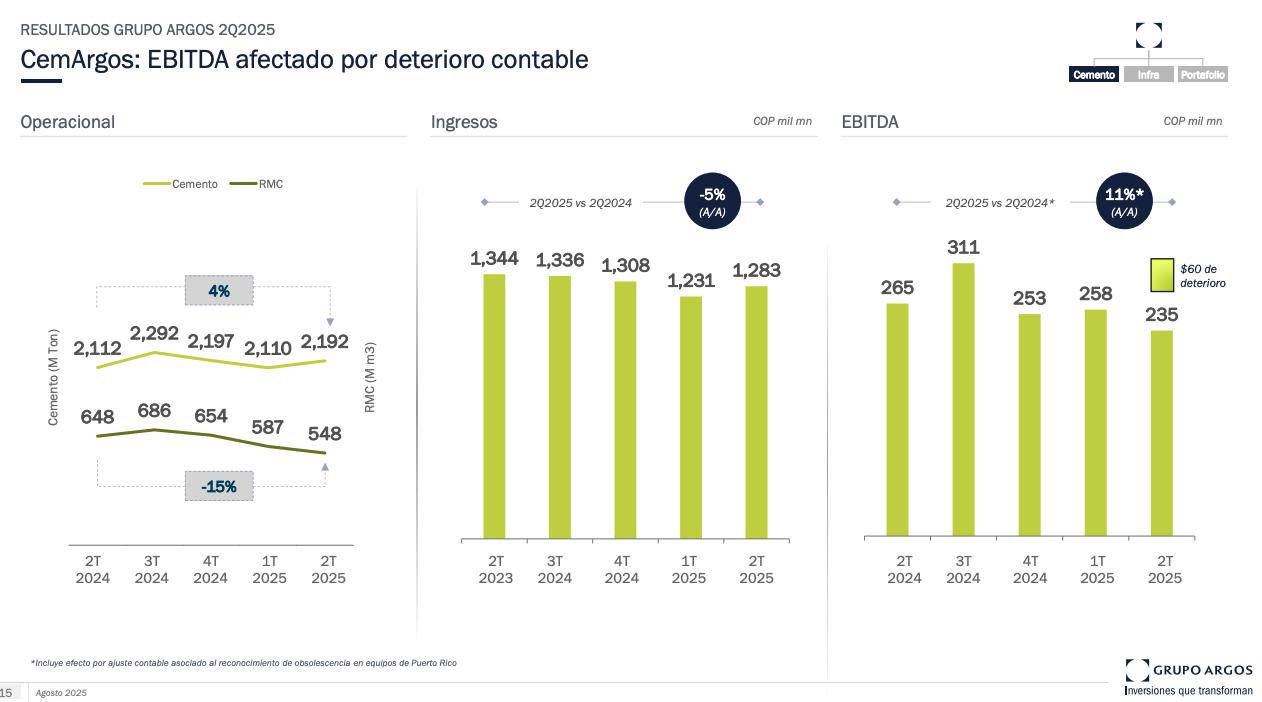



------------------------------------------------------------------------------------------------------------------------

--- Results for Inference 2 ---
Prompt: <image>
Convert the document to markdown.

Markdown Result:


# RESULTADOS GRUPO ARGOS 2Q2025

## CemArgos: EBITDA afectado por deterioro contable

### Operacional

- **Cemento**
- **RMC**

\[\begin{align*}
\text{Compras (M reais)} & \\
2,112 & 648 \\
2,292 & 686 \\
2,197 & 654 \\
2,110 & 587 \\
2,192 & 548 \\
\end{align*}\]

- **-15%**

- **4%**

- **-15%**

- **-5% (A/A)**

- **2Q2025 vs 2Q2024**

- **2Q2025 vs 2Q2024**

- **-5% (A/A)**

- **2Q2025 vs 2O2024**

- **2Q2025 vs 2O2024**

- **-5% (A/A)**

- **2Q2025 vs O2024**

- **2Q2025 vs O2024**

- **-5% (A/A)**

- **2Q2025 vs RMC (M reais)**

- **2Q2025 vs RMC (M reais)**

- **2Q25**

- **2Q25**

- **2Q25**

- **2Q25**

- **(A/A)**

- **2Q25**

- **2Q25**

- **2Q25**

### EBITDA

- **2Q2025 vs 2Q2024**

- **2Q2025**

- **2Q2025**

- **2Q2025**

- **2Q25**

- **2Q25**

- **2Q25**

### COF mil mn

- **2Q2025 vs 2Q2024**

- **2Q2024**

- **2Q2024**

- **2Q2024**

### EBITDA

- **2Q2025 vs 2Q2024**

- **1,344**

- **1,336**

- **1,308**

- **1,231**

- **1,283**

- **2Q2025 vs 2Q2024**

- **2Q2025 (A/A)**

- **2Q2025 (A/A)**

- **2Q2025 (A/A)**


Image with Bounding Boxes:


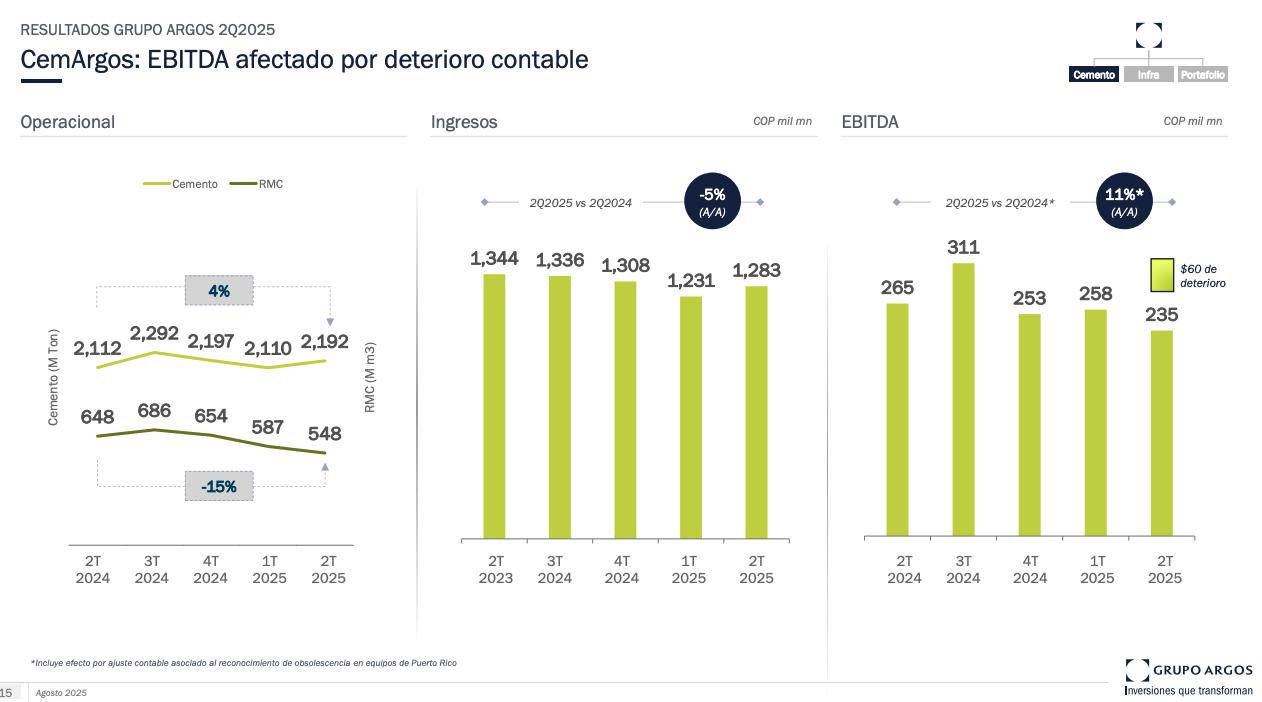



------------------------------------------------------------------------------------------------------------------------

--- Results for Inference 3 ---
Prompt: <image>
Parse the figure.

Markdown Result:


The image displays a bar chart titled "RESULTADOS GRUPO ARGOS 202205" which translates to "RESULTS OF THE ARGOS GROUP 202205." The chart is divided into two main sections, each with a title and a set of bars representing different data points.

On the left side, under the title "Flujo de Caja Acumulado," there are six bars, each labeled with a number from 1 to 6. The bars are color-coded: the first bar is blue, the second is green, the third is red, the fourth is yellow, the fifth is purple, and the sixth is orange. Each bar is labeled with a percentage value, indicating the proportion of the total amount in each category. The percentages range from 14.1% to 4.3%.

On the right side, under the title "Notas," there are three bullet points providing additional information. The first bullet point states that the data is divided into five categories: "Dividendos netos," "Ingresos NDU," "Compra/venta acciones," "Egresos GA," "Egresos NDU," "Impuestos," "FCO," "Intereses netos," "Créditos netos," "Otros ing. - egr. neto," "Caja inicial (dic-24)," and "Caja final (jun-25)." The second bullet point mentions that the data is divided into two categories: "Dividendos netos," "Compra/venta acciones," "Egresos GA," "Egresos ndu," "Impuestos," "FCO," "Intereses netos," "Créditos," "Otros ing. - egr. neto," "Caja inicial (dic -24)," and "Caja final (jun -25)." The third bullet point states that the data is divided into two categories: "Dividendos netos," "Compra venta acciones," "Egresos GA," "Egresos ndu," "Impuestos FCO," "Intereses netos," "Créditos," "Otros ing. -egr. neto," "Caja inicial (dic -24)," and "Caja final" (jun -25).

The chart is set against a white background, and the bars are filled with a gradient of colors, with the darkest at the top and the lightest at the bottom. The text is in Spanish, and the overall layout is clean and organized, making it easy to read and understand the data presented.


Image with Bounding Boxes:


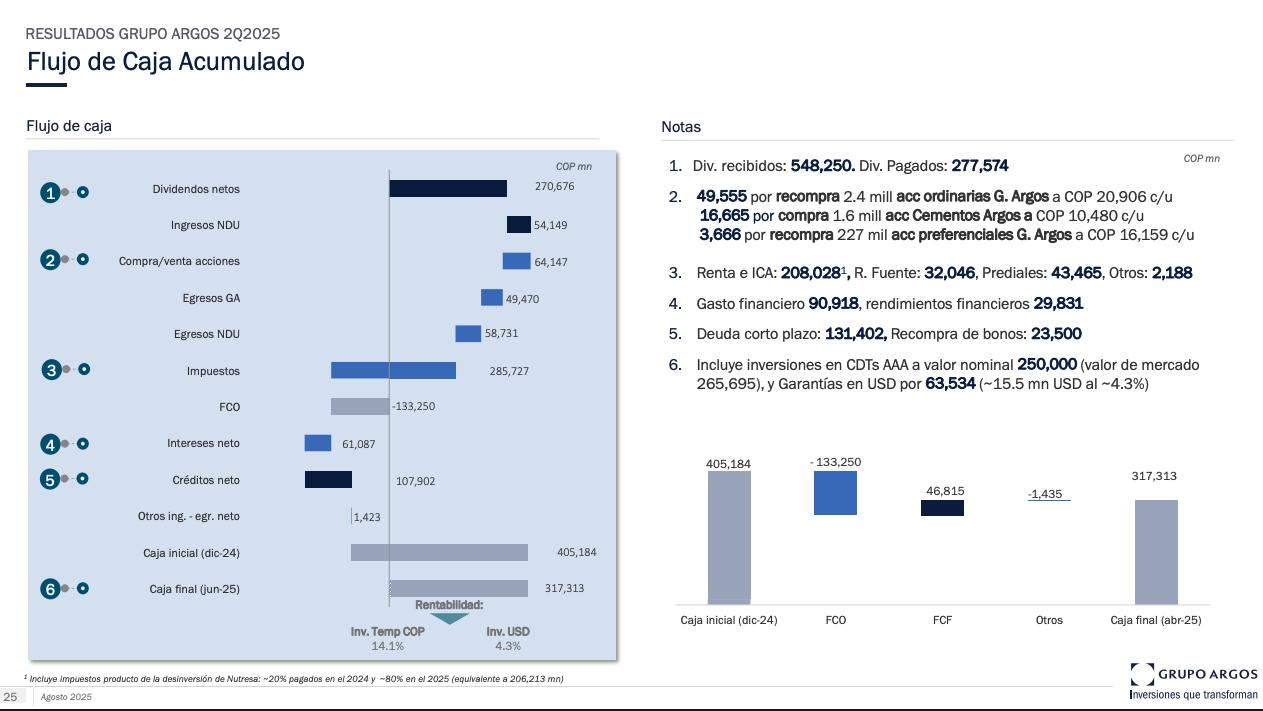



------------------------------------------------------------------------------------------------------------------------

--- Results for Inference 4 ---
Prompt: <image>
identify all objects in the image and output them in bounding boxes.

Markdown Result:



Image with Bounding Boxes:


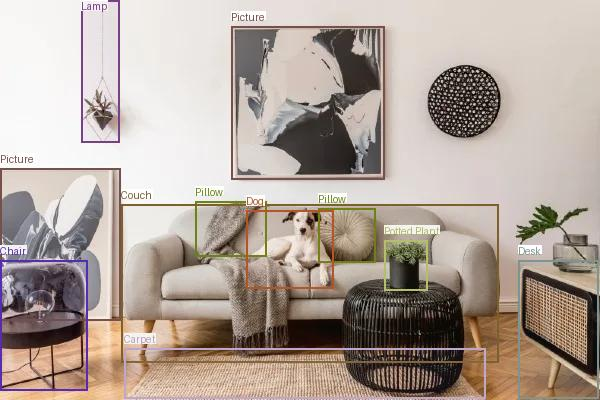



------------------------------------------------------------------------------------------------------------------------

--- Results for Inference 5 ---
Prompt: <image>
Locate <|ref|> icecream <|/ref|> in the image.

Markdown Result:



Image with Bounding Boxes:


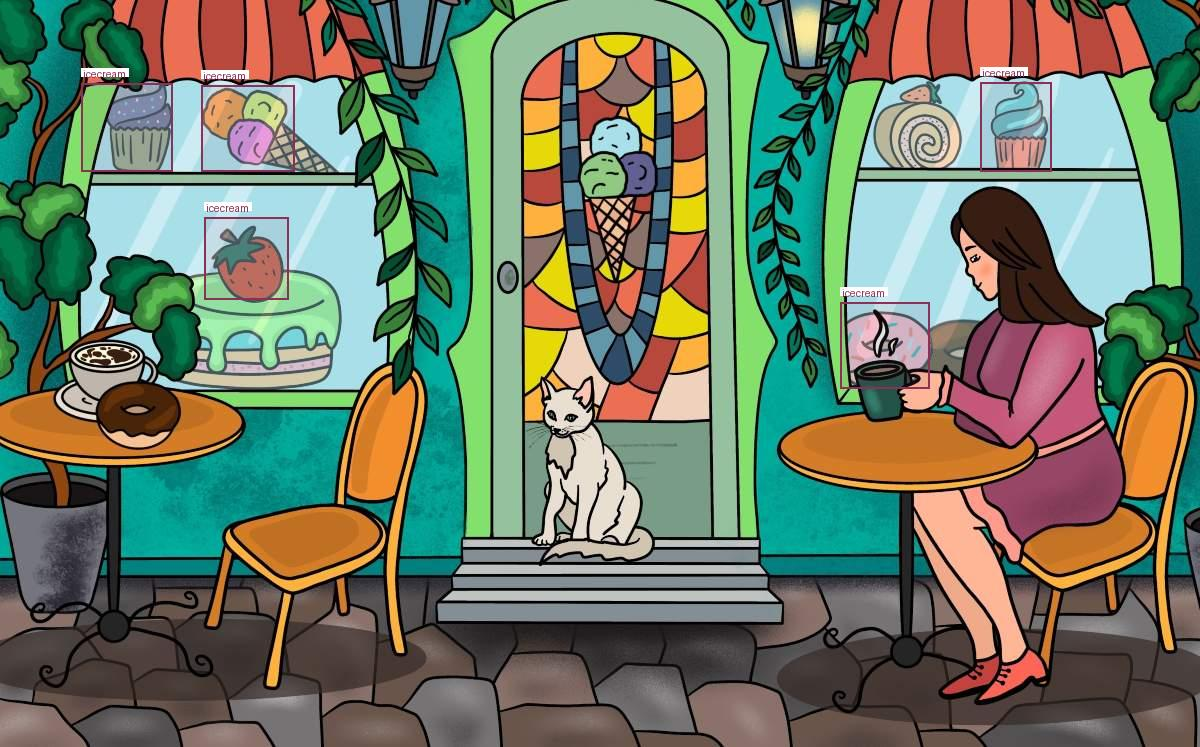



------------------------------------------------------------------------------------------------------------------------

--- Results for Inference 6 ---
Prompt: <image>
Locate <|ref|> X=6 <|/ref|> in the image.

Markdown Result:



Image with Bounding Boxes:


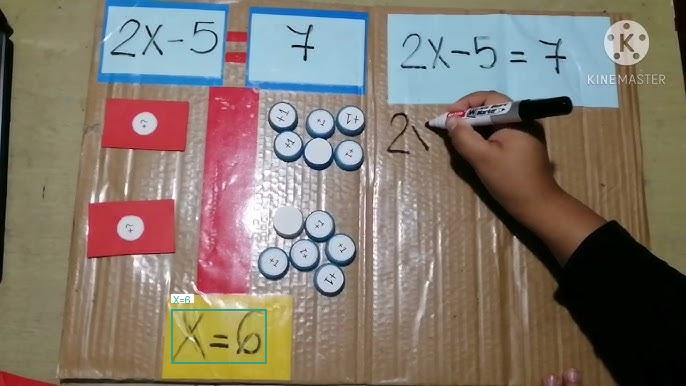



------------------------------------------------------------------------------------------------------------------------

--- Results for Inference 7 ---
Prompt: <image>
Describe this image in detail.

Markdown Result:


A screenshot of a trading terminal. The terminal is displaying a chart of the price of the E-mini S&P 500 futures contract. The chart is in a downtrend, and the price is currently trading at 7,130. The chart is also displaying a number of technical indicators, including the Relative Strength Index (RSI), the Moving Average Convergence Divergence (MACD), and the Bollinger Bands. The RSI is currently at 50, which is in the overbought territory. This indicates that the price is likely to continue to fall. The MACD is also in the overbought territory, which indicates that the price is likely to continue to fall. The Bollinger Bands are also in the overbought territory, which indicates that the price is likely to continue to fall.

The image is a screenshot of a trading terminal. The terminal is displaying a chart of the price of the E-minI S&P 500 futures contract. The chart is in a downtrend, and the price is currentI trading at 7,130. The chart is also displaying a number of technical indicators, including a Relative Strength Index (RSI), a Moving Average Convergence Divergence (MACD), and a Bollinger Bands. The RSI is currently at 50, which is in the over bOched territory. This indicates that the price is likely to continue to fall. The MACD is also at the overbOched territory, which indicates that the price is likely to continue to fall. The Bollinger Bands is also at the overbOched territory, which indicates that the price is likely to continue fall.

The image is a screenshot of a trading terminal. The terminal is displaying a chart of a stock. The chart is in a downtrend, and the price is currently trading at 7,100. The chart is also displaying a number of technical indicators, including a Relative Strength Index (RS), a Moving Average Convergence Divergence (MACD), and a Bollinger Bands.


Image with Bounding Boxes:


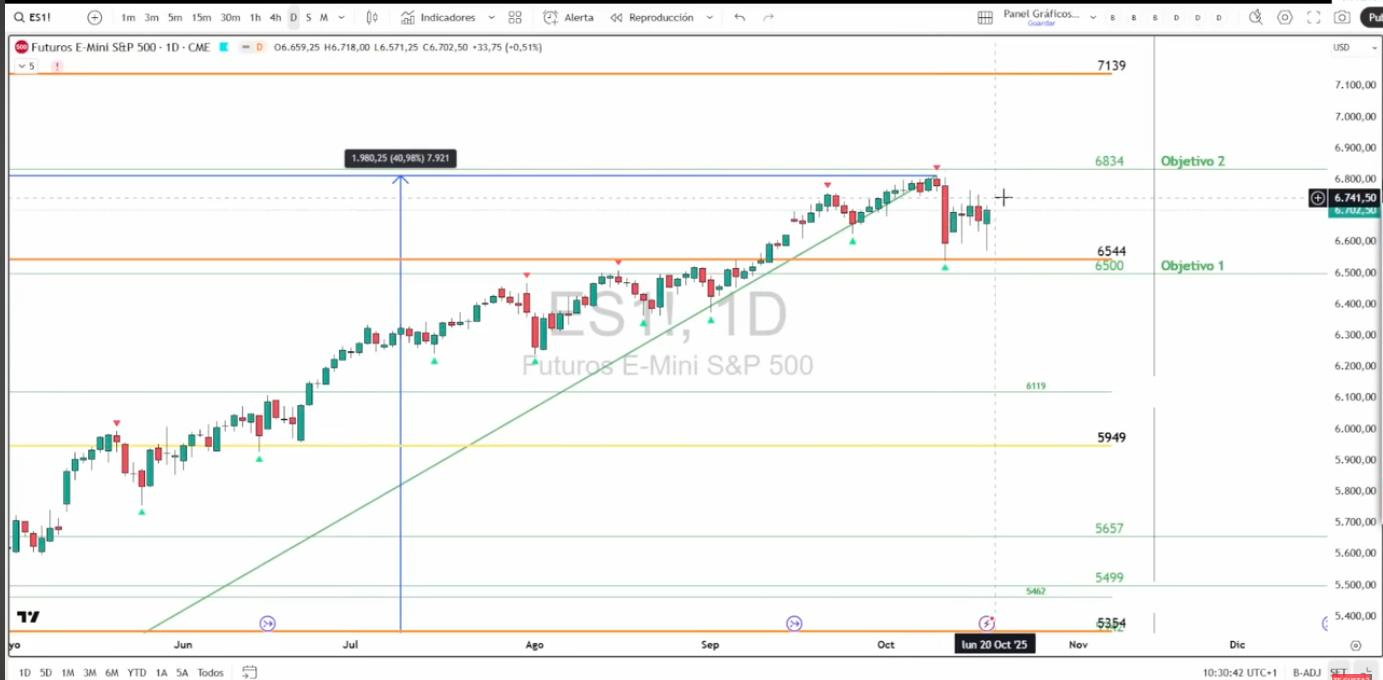

In [12]:
from IPython.display import display, Markdown, Image
import os

for i, result in enumerate(inference_results):
    print("\n")
    print("------"*20)
    print(f"\n--- Results for Inference {i+1} ---")
    print(f"Prompt: {result['prompt']}") # Display the prompt
    output_path = result['output_path']

    # Construct paths for markdown and image files
    markdown_file_path = os.path.join(output_path, 'result.mmd')
    image_file_path = os.path.join(output_path, 'result_with_boxes.jpg')

    # Display markdown content
    print("\nMarkdown Result:")
    try:
        with open(markdown_file_path, 'r') as f:
            markdown_content = f.read()
        display(Markdown(markdown_content))
    except FileNotFoundError:
        print(f"Error: The markdown file was not found at {markdown_file_path}")
    except Exception as e:
        print(f"An error occurred while reading the markdown file: {e}")

    # Display image with bounding boxes
    print("\nImage with Bounding Boxes:")
    try:
        display(Image(filename=image_file_path))
    except FileNotFoundError:
        print(f"Error: The image file was not found at {image_file_path}")
    except Exception as e:
        print(f"An error occurred while displaying the image: {e}")